# Implement a Neural Network

This notebook contains useful information and testing code to help you to develop a neural network by implementing the forward pass and backpropagation algorithm in the `models/neural_net.py` file. 

In [43]:
import matplotlib.pyplot as plt
import numpy as np

from models.neural_net import NeuralNetwork

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """Returns relative error"""
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


You will implement your network in the class `NeuralNetwork` inside the file `models/neural_net.py` to represent instances of the network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays.

The cell below initializes a toy dataset and corresponding model which will allow you to check your forward and backward pass by using a numeric gradient check.

In [44]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5


def init_toy_model(num_layers):
    np.random.seed(0)
    hidden_sizes = [hidden_size] * (num_layers - 1)
    return NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers)

def init_toy_data():
    np.random.seed(0)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.random.randint(num_classes, size=num_inputs)
    return X, y

# Implement forward and backward pass

The first thing you will do is implement the forward pass of your neural network along with the loss calculation. The forward pass should be implemented in the `forward` function. You can use helper functions like `linear`, `relu`, and `softmax` to help organize your code.

Next, you will implement the backward pass using the backpropagation algorithm. Backpropagation will compute the gradient of the loss with respect to the model parameters `W1`, `b1`, ... etc. Use a softmax fuction with cross entropy loss for loss calcuation. Fill in the code blocks in `NeuralNetwork.backward`. 

In [45]:
# """Neural network model."""

# from typing import Sequence

# import numpy as np
# class NeuralNetwork:

#     def __init__(
#         self,
#         input_size: int,
#         hidden_sizes: Sequence[int],
#         output_size: int,
#         num_layers: int,
#     ):
#         self.input_size = input_size
#         self.hidden_sizes = hidden_sizes
#         self.output_size = output_size
#         self.num_layers = num_layers

#         assert len(hidden_sizes) == (num_layers - 1)
#         sizes = [input_size] + hidden_sizes + [output_size]

#         self.params = {}
#         for i in range(1, num_layers + 1):
#             self.params["W" + str(i)] = np.random.randn(
#                 sizes[i - 1], sizes[i]
#             ) / np.sqrt(sizes[i - 1])
#             self.params["b" + str(i)] = np.zeros(sizes[i])

#     def linear(self, W: np.ndarray, X: np.ndarray, b: np.ndarray) -> np.ndarray:
#         return X.dot(W) + b

#     def relu(self, X: np.ndarray) -> np.ndarray:
#         return np.maximum(X,0)

#     def softmax(self, X: np.ndarray) -> np.ndarray:
#         exp_X = np.exp(X - np.max(X, axis = 1).reshape(-1,1))
#         return exp_X / np.sum(exp_X, axis = 1).reshape(-1,1)


#     def forward(self, X: np.ndarray) -> np.ndarray:
#         self.outputs = {}
#         output = X.copy()
#         self.outputs["relu"+str(0)] = X

#         for i in range(1, self.num_layers ):
#             # linear layer
#             self.outputs["linear" + str(i)]  = self.linear(self.params["W" + str(i)], self.outputs["relu" + str(i)], self.params["b"+ str(i)]) 
#             self.outputs["relu" + str(i)] =self.relu(self.outputs["linear" + str(i)])
#             # softmax 
#         self.outputs["linear" + str(i)]  = self.linear(self.params["W" + str(i)], self.outputs["relu" + str(i)], self.params["b"+ str(i)]) 
#         self.outputs["softmax"] = self.softmax(self.outputs["linear" + str(i)])

#         return output

#     def relu_grad(self, X: np.ndarray, G: np.ndarray, i) -> np.ndarray:
#         return np.where(X < 0, 0, G) 

#     def linear_grad(self, X, G, i):
#         N = np.shape(X)[0]
#         X_tmp = X.copy()
#         X_tmp[np.arange(N), Y]-= 1
#         X_tmp /= N
#         return X_tmp

#     def update_grad(self, lr):
#         for i in range (1 ,self.num_layers+1):
#             W = "W" + str(i)
#             b = "b" + str(i)    
#             self.params[W] -= self.gradients[W] * lr
#             self.params[b] -= self.gradients[b] * lr
            
#     def get_loss(self, output, Y, reg):
#         """
#         Calculate loss

#         Parameters:
#             X: the input data (N , C)

#         Returns:
#             single number
#         """
#         loss = 0.0
#         # cross_entropy loss
#         # loss = np.sum(-np.log(self.outputs["z"][np.arange(X.shape[0]), y])) 
#         N = np.shape(output)[0]
#         loss = np.sum(-np.log(output[np.arange(N), Y])) / N

#         for i in range(1, self.num_layers + 1):
#             W = self.params["W" + str(i)]
#             loss += np.sum(W**2) * reg *0.5 / N

#         return loss 

#     def get_accuracy(self, output, y):
#         return np.average(np.argmax(output, axis = 1) == y)


#     def backward(
#         self, X: np.ndarray, y: np.ndarray, lr: float, reg: float = 0.0
#     ) -> float:
#         """Perform back-propagation and update the parameters using the
#         gradients.

#         Parameters:
#             X: Input data of shape (N, D). Each X[i] is a training sample
#             y: Vector of training labels. y[i] is the label for X[i], and each
#                 y[i] is an integer in the range 0 <= y[i] < C
#             lr: Learning rate
#             reg: Regularization strength

#         Returns:
#             Total loss for this batch of training samples
#         """
#         self.gradients = {}
#         # TODO: implement me. You'll want to store the gradient of each layer
#         # in self.gradients if you want to be able to debug your gradients
#         # later. You can use the same keys as self.params. You can add
#         # functions like self.linear_grad, self.relu_grad, and
#         # self.softmax_grad if it helps organize your code.

#         output = self.outputs["softmax"]
#         loss = self.get_loss(output, y, reg)

#         for i in range(self.num_layers, 0, -1):
#             W = "W" + str(i)
#             b = "b" + str(i)
#             # backward softmax layer
#             if (i == self.num_layers):
#                 G = self.softmax_grad( output, y,reg)

#             # backward relu layer
#             else:
#                 X_input = self.outputs["linear" + str(i)]
#                 G = self.relu_grad(X_input, G, i)

#             # backward linear layer
#             if (i == 1):
#                 X_input = X.copy()
#             else:
#                 X_input = self.outputs["relu" +str(i-1)] 
#             W_grad, b_grad, G = self.linear_grad(X_input, G, i)
            
#             # save gradients
#             self.gradients[W] = W_grad.copy() + reg * self.params[W] 
#             self.gradients[b] = b_grad.copy() 

#         # SGD
#         self.update_grad(lr)
        
#         return loss


In [46]:
# # Train the network
# To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers you trained. This should be similar to the training procedure you used for the SVM and Softmax classifiers.
# """Neural network model."""

# Once you have implemented SGD, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2 using a two-layer network with relu activation.

SyntaxError: invalid syntax (<ipython-input-46-b198adcc04c3>, line 2)

In [19]:
# Hyperparameters
epochs = 100
batch_size = 5
learning_rate = 1e-1
learning_rate_decay = 0.95
regularization = 5e-6

# Initialize a new neural network model
net = init_toy_model(2)

# Variables to store performance for each epoch
train_loss = np.zeros(epochs)
train_accuracy = np.zeros(epochs)

X_train, y_train = init_toy_data()

for epoch in range(epochs):
    print('epoch:', epoch)
    
    # Shuffle the dataset
    N = np.shape(X_train)[0]
    print("N = ",N)
    shuffle_index = np.random.permutation(N)
    X = X_train[shuffle_index]
    Y = y_train[shuffle_index]
    
    # Training
    # For each mini-batch...
    n_batches = N // batch_size
    for batch in range(n_batches):
        # Create a mini-batch of training data and labels
        X_batch = X[batch*batch_size : batch*batch_size + batch_size]
        y_batch = Y[batch*batch_size : batch*batch_size + batch_size]        

        # Run the forward pass of the model to get a prediction and compute the accuracy
        output = net.forward(X_batch)
        
        print (np.argmax(output, axis = 1) == y_batch)

        print ("output = ", output)

        train_accuracy[epoch] += net.get_accuracy(output, y_batch)
        
    
        # Run the backward pass of the model to update the weights and compute the loss
        loss= net.backward(X_batch, y_batch,learning_rate , regularization)
        train_loss[epoch] += loss         

       

    # learning rate decay
    learning_rate *= learning_rate_decay
    
    train_loss[epoch] /= n_batches
    train_accuracy[epoch] /= n_batches
    print("loss = ",train_loss[epoch])
    print ("accuracy = ", train_accuracy[epoch])


0.00467936]
 [0.30516296 0.39146202 0.30337501]
 [0.30516296 0.39146202 0.30337501]
 [0.30516296 0.39146202 0.30337501]
 [0.30516296 0.39146202 0.30337501]]
loss =  0.8588236944200627
accuracy =  0.6
epoch: 30
N =  5
[False False  True  True  True]
output =  [[0.30486137 0.39211084 0.30302779]
 [0.30486137 0.39211084 0.30302779]
 [0.96330151 0.03205012 0.00464837]
 [0.30486137 0.39211084 0.30302779]
 [0.30486137 0.39211084 0.30302779]]
loss =  0.8585073541884715
accuracy =  0.6
epoch: 31
N =  5
[False  True  True False  True]
output =  [[0.30457596 0.39272414 0.3026999 ]
 [0.30457596 0.39272414 0.3026999 ]
 [0.30457596 0.39272414 0.3026999 ]
 [0.30457596 0.39272414 0.3026999 ]
 [0.96366273 0.03171794 0.00461933]]
loss =  0.8582110755470517
accuracy =  0.6
epoch: 32
N =  5
[ True  True False False  True]
output =  [[0.30430584 0.39330399 0.30239018]
 [0.96399889 0.03140904 0.00459208]
 [0.30430584 0.39330399 0.30239018]
 [0.30430584 0.39330399 0.30239018]
 [0.30430584 0.39330399 0.30239

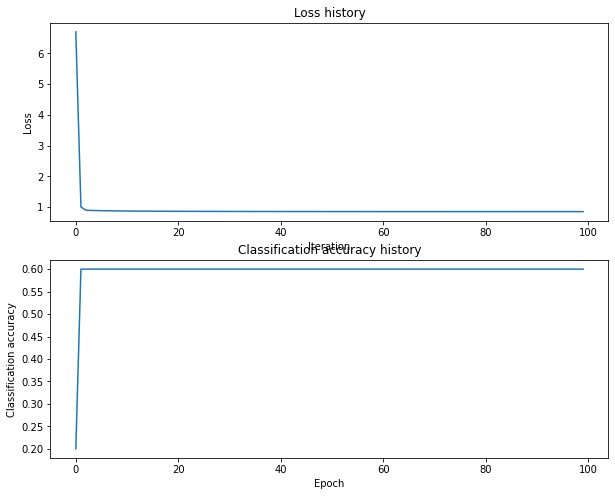

In [20]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_loss)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_accuracy)
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.show()